# Network Science H21: Assignment 3 (by Jan Bauer 18-764-571)

## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from scipy.interpolate import make_interp_spline
import seaborn as sns
sns.set_palette("bright")
import scipy.stats as sp

## Functions

In [2]:
def avg(lst):
    return sum(lst) / len(lst)

In [21]:
def randomize_graph(graph):
    return nx.algorithms.smallworld.random_reference(graph, niter=10, connectivity=False, seed=42)

In [3]:
def plot_degree_distribution(deg, xscale='linear', yscale='linear', bins=30, density=True):
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    average_degree = avg(deg)
    print("Average Degree: {}".format(average_degree))
    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), bins)
        plt.axvline(x=average_degree, ymin=0, ymax=1, color="Red")
        plt.hist(deg, binlog, density = density, alpha=0.5)

    else:
        title+="Lin"
        plt.axvline(x=average_degree, ymin=0, ymax=1, color="Red")
        plt.hist(deg, bins = bins, density = density, alpha=0.5)
        
    if yscale == 'log':
        title+="-Log Scale"
    else:
        title+="-Lin Scale"
        
    plt.xlabel('k')
    plt.ylabel("P(k)")
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

In [26]:
def plot_ratio(x, y, title='', xlabel='', ylabel=''):
    sns.scatterplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [16]:
def pearson_correlation_coefficient(x, y):
    return (sp.pearsonr(x,y)[0])

In [17]:
def spearman_correlation_coefficient(x, y):
    return (sp.spearmanr(x,y)[0])

In [18]:
def kendall_correlation_coefficient(x, y):
    return (sp.kendalltau(x,y)[0])

In [23]:
def analyze_centrality_metrics(graph, graph_name='', visualize=False):
    degree_centrality = list(nx.degree_centrality(graph).values())
    betweenness_centrality = list(nx.betweenness_centrality(graph).values())
    closeness_centrality = list(nx.closeness_centrality(graph).values())
    eigenvector_centrality = list(nx.eigenvector_centrality(graph).values())
    
    centrality_metrics = {}
    centrality_metrics['Degree Centrality'] = degree_centrality
    centrality_metrics['Betweenness Centrality'] = betweenness_centrality
    centrality_metrics['Closeness Centrality'] = closeness_centrality
    centrality_metrics['Eigenvector Centrality'] = eigenvector_centrality
    
    if visualize:
        visualize_centrality_metrics(centrality_metrics, graph_name=graph_name)
    
    return centrality_metrics
    

In [20]:
def visualize_centrality_metrics(centrality_metrics, graph_name=''):
    print("--- {} ---".format(graph_name))
    for metric_one, metric_one_values in centrality_metrics.items():
        for metric_two, metric_two_values in centrality_metrics.items():
            if metric_one == metric_two:
                break
            pearson_cc = pearson_correlation_coefficient(metric_one_values, metric_two_values)
            spearman_cc = spearman_correlation_coefficient(metric_one_values, metric_two_values)
            kendall_cc = kendall_correlation_coefficient(metric_one_values, metric_two_values)
            
            print("Pearson Correlation Coefficient: {}".format(pearson_cc))
            print("Spearman Correlation Coefficient: {}".format(spearman_cc))
            print("Kendall Correlation Coefficient: {}".format(kendall_cc))
            plot_ratio(metric_one_values, metric_two_values, "{0}\n ({1} vs {2})".format(graph_name, metric_one, metric_two), metric_one, metric_two)
            print("---")

In [87]:
def compare_centrality_metrics(graph_centralities, randomized_graph_centralities, graph_name=''):
    print("--- {} ---".format(graph_name))
    for metric_name, metrics_on_graph in graph_centralities.items():
        metrics_on_randomized_graph = randomized_graph_centralities[metric_name]
        
        pearson_cc = pearson_correlation_coefficient(metrics_on_graph, metrics_on_randomized_graph)
        spearman_cc = spearman_correlation_coefficient(metrics_on_graph, metrics_on_randomized_graph)
        kendall_cc = kendall_correlation_coefficient(metrics_on_graph, metrics_on_randomized_graph)
            
        print("Pearson Correlation Coefficient: {}".format(pearson_cc))
        print("Spearman Correlation Coefficient: {}".format(spearman_cc))
        print("Kendall Correlation Coefficient: {}".format(kendall_cc))
        plot_ratio(metrics_on_graph, metrics_on_randomized_graph, title='{0} (G) vs {0} (G_RND)'.format(metric_name), xlabel='{0} (G)'.format(metric_name), ylabel='{0} (G_RND)'.format(metric_name))

## A03.1 Centrality correlations

In [75]:
florida_foodweb_graph = nx.read_graphml('./data/Florida_foodweb.graphml')

--- Florida Foodweb Graph ---
Pearson Correlation Coefficient: 0.4681386573396808
Spearman Correlation Coefficient: 0.5886379570841723
Kendall Correlation Coefficient: 0.4549738853128151


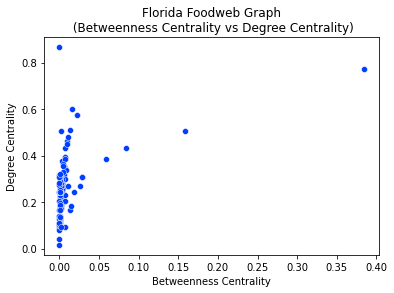

---
Pearson Correlation Coefficient: 0.578582691079816
Spearman Correlation Coefficient: 0.518787807171966
Kendall Correlation Coefficient: 0.36431502491036594


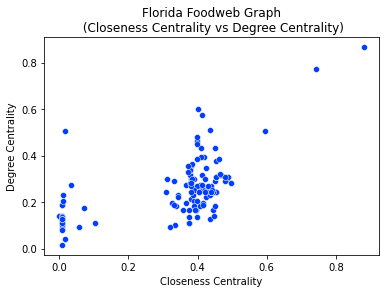

---
Pearson Correlation Coefficient: 0.29723933648729317
Spearman Correlation Coefficient: 0.2516604650880421
Kendall Correlation Coefficient: 0.20014298702673392


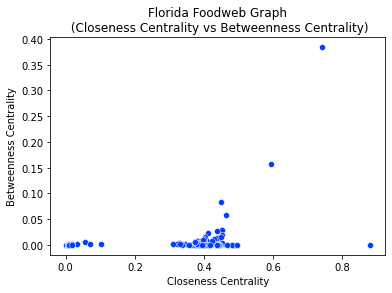

---
Pearson Correlation Coefficient: 0.6070504663644315
Spearman Correlation Coefficient: 0.4598563415472071
Kendall Correlation Coefficient: 0.33132832643494015


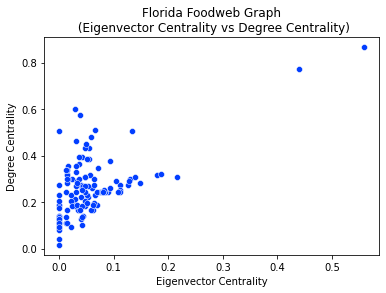

---
Pearson Correlation Coefficient: 0.462168576151432
Spearman Correlation Coefficient: 0.059355620614243904
Kendall Correlation Coefficient: 0.0476350267769789


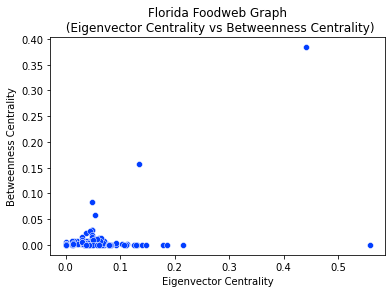

---
Pearson Correlation Coefficient: 0.6489903987452532
Spearman Correlation Coefficient: 0.8607000814346918
Kendall Correlation Coefficient: 0.7161438281872765


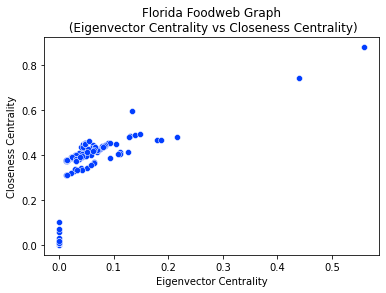

---


In [27]:
graph_centralities = analyze_centrality_metrics(florida_foodweb_graph, graph_name='Florida Foodweb Graph', visualize=True)

In [36]:
jazz_colab_graph = nx.read_gml('./data/graph_jazz_collab.gml')

In [37]:
randomized_jazz_colab_graph = randomize_graph(jazz_colab_graph)

In [46]:
randomized_jazz_colab_graph_centralities = analyze_centrality_metrics(randomized_jazz_colab_graph, graph_name='Randomized Jazz Colab Graph')

--- Jazz Colab Graph ---
Pearson Correlation Coefficient: 0.6051349791324675
Spearman Correlation Coefficient: 0.7425814037045884
Kendall Correlation Coefficient: 0.5787072584461876


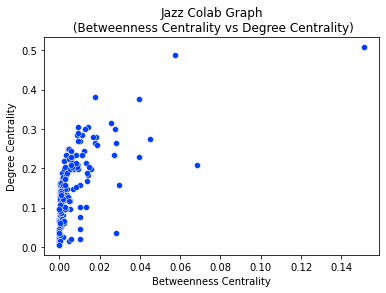

---
Pearson Correlation Coefficient: 0.8587106972182641
Spearman Correlation Coefficient: 0.889975818308689
Kendall Correlation Coefficient: 0.735952618073043


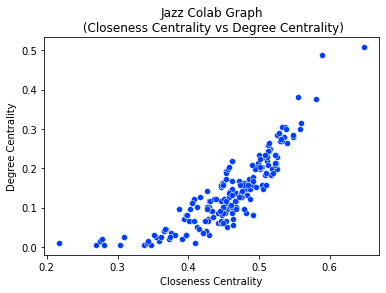

---
Pearson Correlation Coefficient: 0.47453331814710176
Spearman Correlation Coefficient: 0.7296349465164756
Kendall Correlation Coefficient: 0.565570608829298


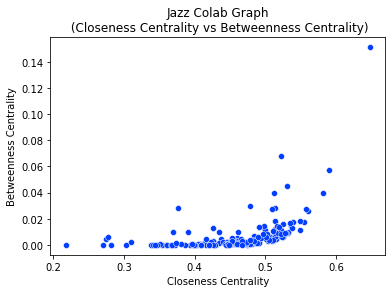

---
Pearson Correlation Coefficient: 0.9009969374426154
Spearman Correlation Coefficient: 0.8898117929232551
Kendall Correlation Coefficient: 0.7502856369607784


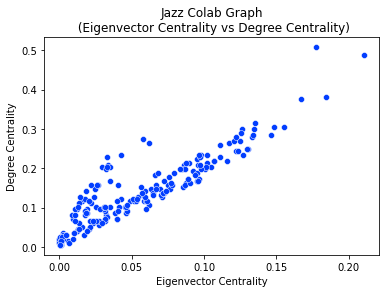

---
Pearson Correlation Coefficient: 0.3973982091413413
Spearman Correlation Coefficient: 0.5668170831713113
Kendall Correlation Coefficient: 0.41654175039907354


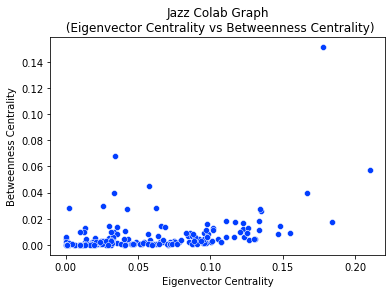

---
Pearson Correlation Coefficient: 0.7836833939294424
Spearman Correlation Coefficient: 0.8396874476211065
Kendall Correlation Coefficient: 0.6816900712021191


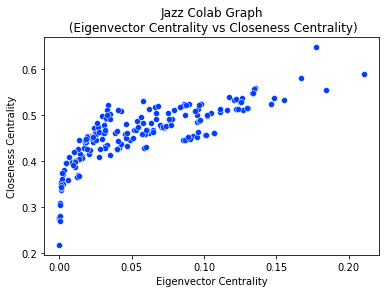

---


In [47]:
jazz_colab_graph_centralities = analyze_centrality_metrics(jazz_colab_graph, graph_name='Jazz Colab Graph', visualize=True)

In [93]:
polblog_graph = nx.read_gml('./data/graph_polblog.gml')

In [94]:
randomized_polblog_graph = randomize_graph(polblog_graph)

In [95]:
randomized_polblog_graph_centralities = analyze_centrality_metrics(randomized_polblog_graph, graph_name='Randomized Polblog Graph')

--- Polblog Graph ---
Pearson Correlation Coefficient: 0.7506490423033738
Spearman Correlation Coefficient: 0.9074662557288968
Kendall Correlation Coefficient: 0.7650728276270042


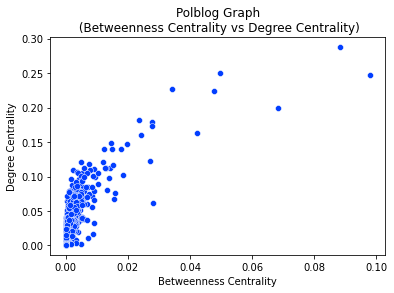

---
Pearson Correlation Coefficient: 0.7231572938687222
Spearman Correlation Coefficient: 0.9235824237834013
Kendall Correlation Coefficient: 0.7667639730160004


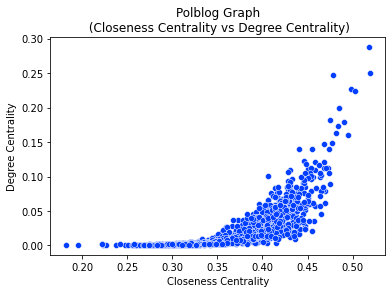

---
Pearson Correlation Coefficient: 0.39145107829724884
Spearman Correlation Coefficient: 0.8595291353276445
Kendall Correlation Coefficient: 0.6909056080911741


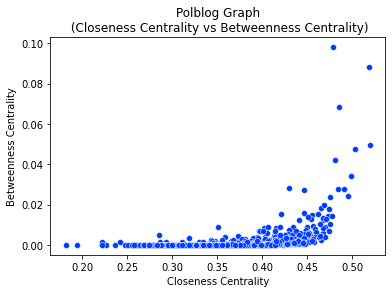

---
Pearson Correlation Coefficient: 0.8839868880099128
Spearman Correlation Coefficient: 0.9518430233171465
Kendall Correlation Coefficient: 0.8141941352508475


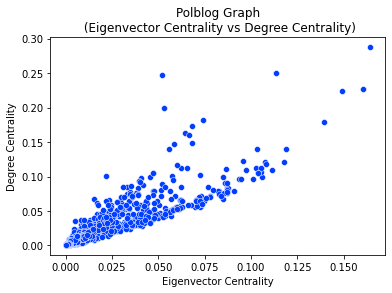

---
Pearson Correlation Coefficient: 0.5053636953323739
Spearman Correlation Coefficient: 0.8359068917351268
Kendall Correlation Coefficient: 0.6565591310732064


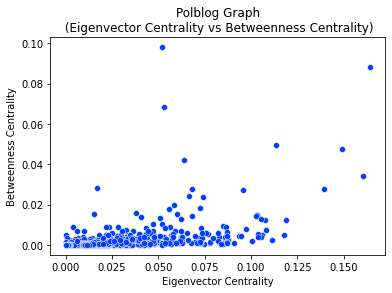

---
Pearson Correlation Coefficient: 0.7027942099795031
Spearman Correlation Coefficient: 0.9199400509762885
Kendall Correlation Coefficient: 0.7552717069180305


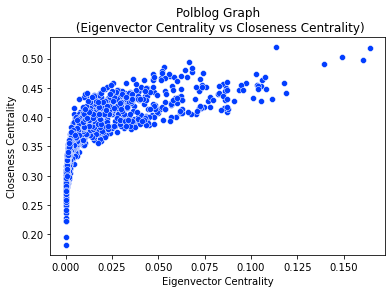

---


In [96]:
polblog_graph_centralities = analyze_centrality_metrics(polblog_graph, graph_name='Polblog Graph', visualize=True)

In [97]:
terrorists_graph = nx.read_gml('./data/graph_terrorists.gml')

In [98]:
randomized_terrorists_graph = randomize_graph(terrorists_graph)

In [99]:
randomized_terrorists_graph_centralities = analyze_centrality_metrics(randomized_terrorists_graph, graph_name='Randomized Terrorists Graph')

--- Terrorists Graph ---
Pearson Correlation Coefficient: 0.75077361708502
Spearman Correlation Coefficient: 0.8385154596500505
Kendall Correlation Coefficient: 0.6965515610208624


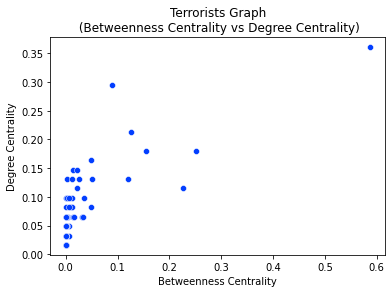

---
Pearson Correlation Coefficient: 0.8373140120704976
Spearman Correlation Coefficient: 0.830732183391181
Kendall Correlation Coefficient: 0.7013857454691395


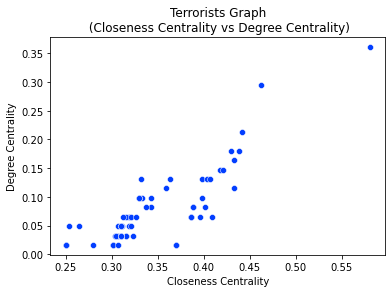

---
Pearson Correlation Coefficient: 0.680095825217133
Spearman Correlation Coefficient: 0.7463655135604728
Kendall Correlation Coefficient: 0.5907758316227861


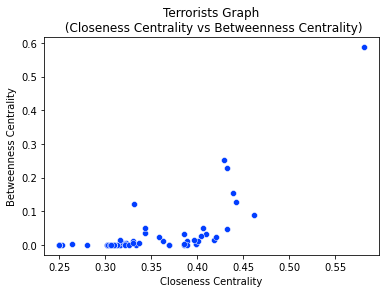

---
Pearson Correlation Coefficient: 0.8569050642191779
Spearman Correlation Coefficient: 0.7909065405054472
Kendall Correlation Coefficient: 0.630057095271975


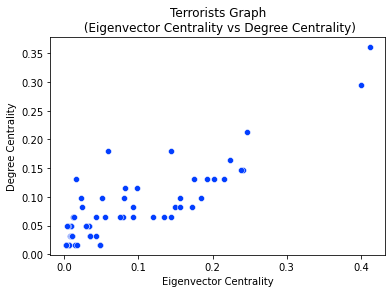

---
Pearson Correlation Coefficient: 0.493739297280244
Spearman Correlation Coefficient: 0.5556260266180424
Kendall Correlation Coefficient: 0.4104369474731793


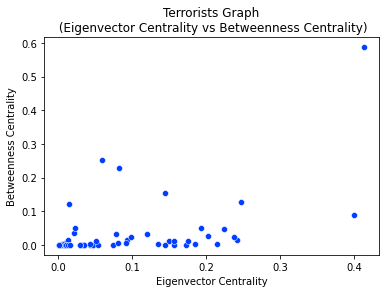

---
Pearson Correlation Coefficient: 0.8585535503034174
Spearman Correlation Coefficient: 0.8802954460285214
Kendall Correlation Coefficient: 0.7210620510878796


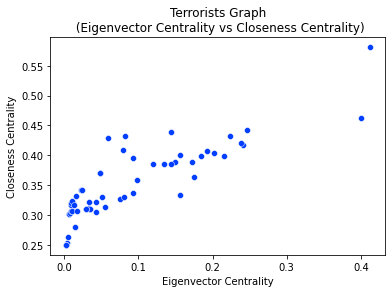

---


In [100]:
terrorists_graph_centralities = analyze_centrality_metrics(terrorists_graph, graph_name='Terrorists Graph', visualize=True)

### "Briefly explain, for the Jazz collaborations data, what each of the centrality measures means in practice."

The jazz collaboration network contains information about bands that performed between 1912 and 1940.  
Nodes represent jazz musicians and Edges represent collaborations in the given time period.  

#### Degree centrality
The formula for degree centrality $k_i$ for node i that networkx uses is $k_{i} =\frac{1}{N-1}\sum_{j=1}^{N}a_{ij}$.  
(Normalise by the maximum possible degree N-1)  
The degree centrality for a node i is the fraction of nodes it is connected to.  
For the Jazz collaborations data this ratio basically represents  
the ratio of bands one Jazz muscician collaborated with between 1912 and 1940.

#### Betweenness centrality
The higher the betweenness centrality in the Jazz collaborations example  
the easier it would be for a musicians to connect the network over multiple hops with each other.  
For example when a musician would like to establish a connection to someone who he does not know yet  
it would make the most sense to start with his musician friends who have the highest degree of betweenness centrality.  
![""](./Images/betweenness_centrality.png)

#### Closeness centrality
The closeness centrality $CC_i$ of a node i is defined as $CC_i = \frac{N-1}{\sum_{j=1}^{N}d(i,j)}$.  
It is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes.  
Since it depends on the whole network, it is a global property.  
In case of the Jazz collaborations it expresses how closely a Jazz musician collaborated with the whole network of Jazz musicians.  


#### Eigenvector centrality
If A is the adjacency matrix of the network G and $\lambda$ is a constant, we define the centrality of node 𝑖 by  
$v_i = \frac{1}{\lambda}\sum_{j \in N_{i}}^{}v_j$ = $\frac{1}{\lambda}\sum_{j=1}^{N}a_{ij}v_j$
In case of the Jazz collaborations this means a Jazz musicians A is better connected to other Jazz musicians  
if his eigenvector centraility is higher than the one of Jazz musician B.


## A03.2 Centrality and randomisation

--- Jazz Colab ---
Pearson Correlation Coefficient: 1.0
Spearman Correlation Coefficient: 1.0
Kendall Correlation Coefficient: 1.0


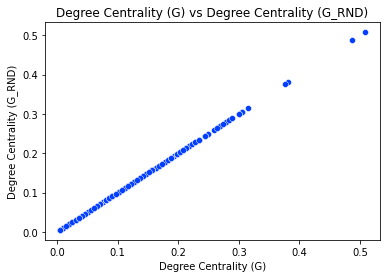

Pearson Correlation Coefficient: 0.7696059657419974
Spearman Correlation Coefficient: 0.722638821108619
Kendall Correlation Coefficient: 0.5497403996312192


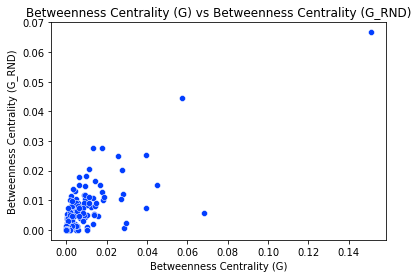

Pearson Correlation Coefficient: 0.9054788568329368
Spearman Correlation Coefficient: 0.8867565251179754
Kendall Correlation Coefficient: 0.7263388463477924


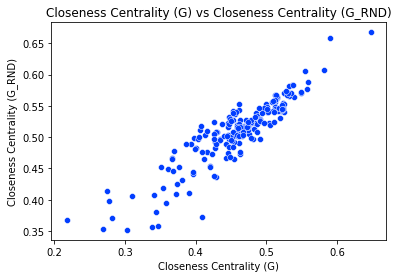

Pearson Correlation Coefficient: 0.8952180265211573
Spearman Correlation Coefficient: 0.8799698228865805
Kendall Correlation Coefficient: 0.7281212456068421


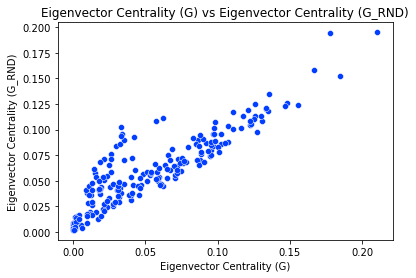

In [90]:
compare_centrality_metrics(jazz_colab_graph_centralities, randomized_jazz_colab_graph_centralities, graph_name="Jazz Colab")

--- Polblog Graph ---
Pearson Correlation Coefficient: 0.9999999999999996
Spearman Correlation Coefficient: 1.0
Kendall Correlation Coefficient: 1.0


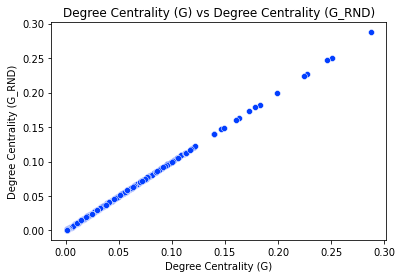

Pearson Correlation Coefficient: 0.9064815492959242
Spearman Correlation Coefficient: 0.8729102584574265
Kendall Correlation Coefficient: 0.7109585900329658


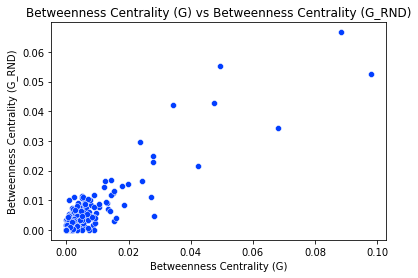

Pearson Correlation Coefficient: 0.8560335859223539
Spearman Correlation Coefficient: 0.89772870585876
Kendall Correlation Coefficient: 0.7153792199012237


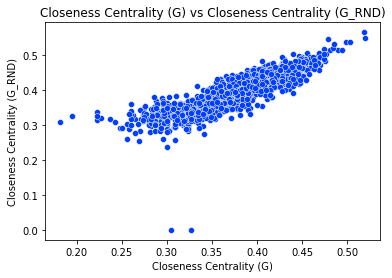

Pearson Correlation Coefficient: 0.8944286945112181
Spearman Correlation Coefficient: 0.9380751316052471
Kendall Correlation Coefficient: 0.7750441191028938


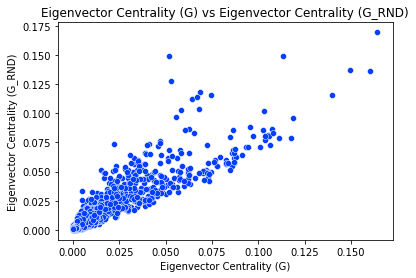

In [91]:
compare_centrality_metrics(polblog_graph_centralities, randomized_polblog_graph_centralities, graph_name="Polblog Graph")

--- Terrorists Graph ---
Pearson Correlation Coefficient: 0.9999999999999996
Spearman Correlation Coefficient: 1.0
Kendall Correlation Coefficient: 1.0


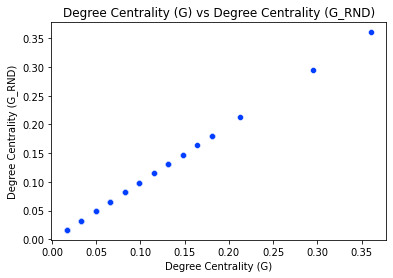

Pearson Correlation Coefficient: 0.78003865745429
Spearman Correlation Coefficient: 0.8095732898960759
Kendall Correlation Coefficient: 0.6433307428627077


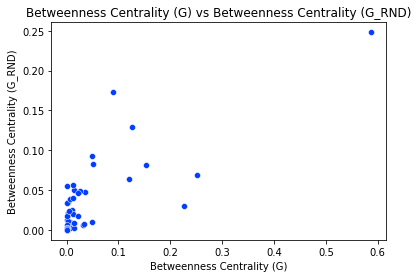

Pearson Correlation Coefficient: 0.7261042216750904
Spearman Correlation Coefficient: 0.7413410753175869
Kendall Correlation Coefficient: 0.5706616764600256


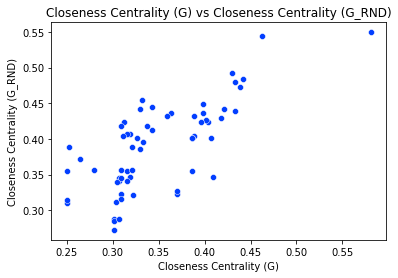

Pearson Correlation Coefficient: 0.769406705999051
Spearman Correlation Coefficient: 0.7043282315179947
Kendall Correlation Coefficient: 0.51657532430467


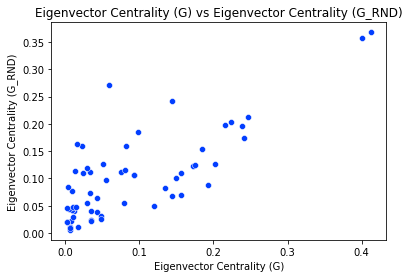

In [89]:
compare_centrality_metrics(terrorists_graph_centralities, randomized_terrorists_graph_centralities, graph_name="Terrorists Graph")

### "Why do you get that result for degree centrality?"
The formula for degree centrality $k_i$ for node i that networkx uses is $k_{i} =\frac{1}{N-1}\sum_{j=1}^{N}a_{ij}$.  
In the implementation [reference](https://networkx.org/documentation/stable/_modules/networkx/algorithms/smallworld.html#random_reference) of the function used to randomize the graph  
you can see that from all four nodes which are part of every swapping iteration, one edge is removed, but also one edge is added.  
This basically leaves the degree of every node untouched.   
The number of nodes in the network also stays the same.  
And therefore, degree_centrality(G) = degree_centrality(G_RND)


![""](./Images/random_reference.png)

## A03.3 Page Rank

In [134]:
alpha_to_spearman_correlation = {}
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
alpha_baseline = 0.85

In [135]:
pr_alpha_baseline = list(nx.pagerank(florida_foodweb_graph, alpha=alpha_baseline).values())

In [136]:
for alpha in alphas:
    pr_alpha = list(nx.pagerank(florida_foodweb_graph, alpha=alpha).values())
    spearman_cc = spearman_correlation_coefficient(pr_alpha_baseline, pr_alpha)
    alpha_to_spearman_correlation[alpha] = spearman_cc 

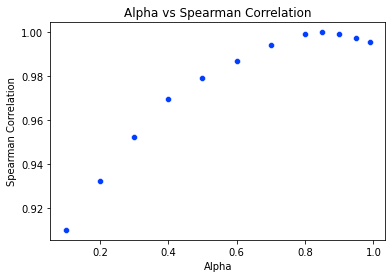

In [137]:
plot_ratio(list(alpha_to_spearman_correlation.keys()), list(alpha_to_spearman_correlation.values()), title='Alpha vs Spearman Correlation', xlabel='Alpha', ylabel='Spearman Correlation')